In [3]:
import math
import numpy as ny
from matplotlib import pyplot as py

In [4]:
N = 50  # total number of gridpoints
x_start, x_end = -2.0, 2.0 # boundaries in x
y_start, y_end = -1.0, 1.0 # boundaries in y
x = ny.linspace(x_start, x_end, N) # creates 1d array in x
y = ny.linspace(y_start, y_end, N) # creates 1d array in y

X, Y = ny.meshgrid(x,y) # generates the mesh grid
                


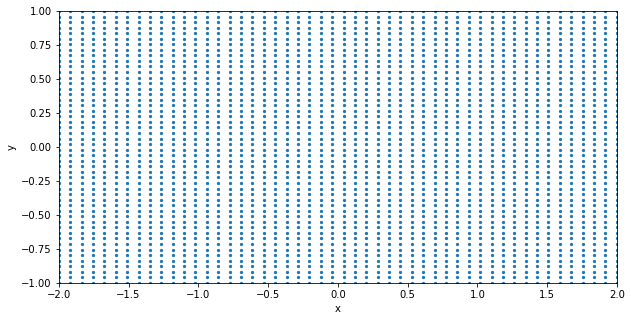

In [5]:
%matplotlib inline

# plot the entire grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlabel('x')
py.ylabel('y')
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.scatter(X, Y, s=5, marker='o')

In [6]:
# we are going to place the source (total flow point)
# at -1, 0 and give it a strength of 5

In [7]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

# compute the velocity field on the mesh grid
u_source = (strength_source / (2 * math.pi) *
            (X- x_source) / ((X - x_source)**2 + 
                             (Y - y_source)**2))
v_source = (strength_source
            / (2 * math.pi) *
           (Y - y_source) / ((X - x_source)**2 +
                            (Y - y_source)**2))

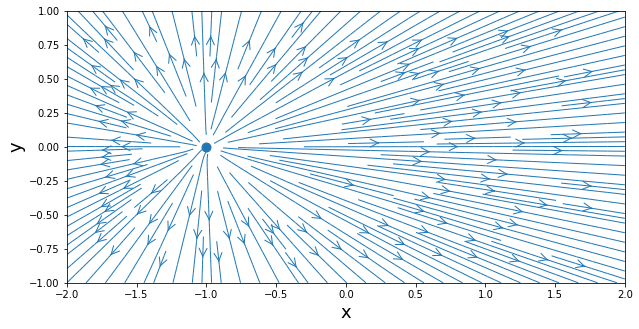

In [8]:
# plot the new streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlabel('x', fontsize = 18)
py.ylabel('y', fontsize = 18)
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u_source, v_source, density = 2,
             linewidth=1, arrowsize=2, arrowstyle='->')
py.scatter(x_source, y_source, s=80, marker='o');

Challenge Question:

What is the total mass flux outwards of a small closed surface around the source?


In [9]:
#sink flow - a source with a negative strength is 
# called a sink.

# we will place the sink at the location (1,0) and
# equal strength but negative to the other

In [10]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0

# compute velocity on the mesh grid

u_sink = (strength_sink / (2 * math.pi) * 
         (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

v_sink = (strength_sink / (2 * math.pi) *
         (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

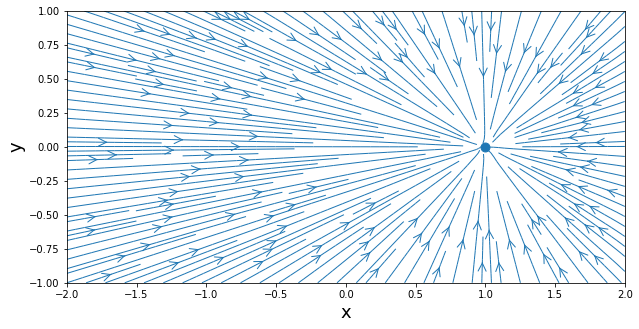

In [11]:
# plot streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlabel('x', fontsize = 18)
py.ylabel('y', fontsize = 18)
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u_sink, v_sink, density = 2,
             linewidth=1, arrowsize=2, arrowstyle='->')
py.scatter(x_sink, y_sink, s=80, marker='o');

SOURCE_SINK PAIR

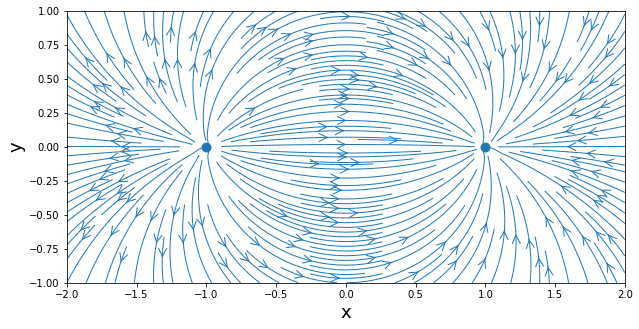

In [12]:
#compute the velocty of pair by superposition
u_pair = u_source + u_sink
v_pair = v_source + v_sink

#plot streamlines of pair
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlabel('x', fontsize = 18)
py.ylabel('y', fontsize = 18)
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u_pair, v_pair, density = 2,
             linewidth=1, arrowsize=2, arrowstyle='->')
py.scatter([x_source,x_sink], [y_source, y_sink], s=80, marker='o');

CHALLENGE TASK

Write your own code for plotting the potentail lines, instead of streamlines. You might want to use the contour() function for this.

In [26]:
def get_potential(strength, X, Y, x_s, y_s):
# compute velocity on the mesh grid
    poten = (strength / (2 * math.pi) * 
               ny.log(ny.sqrt((X - x_s)**2 + (Y - y_s)**2)))
    return poten


In [35]:
poten_sink = get_potential(-50, X, Y, x_sink, y_sink)

In [36]:
poten_source = get_potential(strength_source, X, Y, x_source, y_source)

In [37]:
poten_total = poten_sink + poten_source

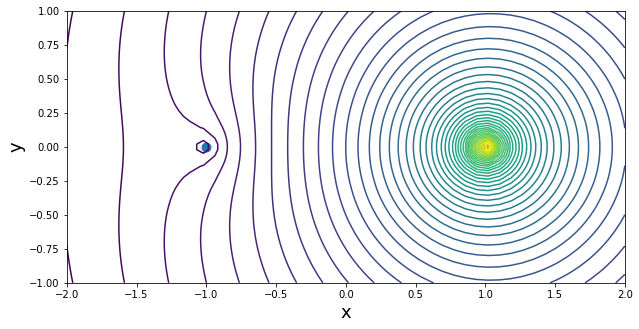

In [38]:
#plot potential lines of pair
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlabel('x', fontsize = 18)
py.ylabel('y', fontsize = 18)
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.contour(X, Y, poten_total, 51)
py.scatter([x_source,x_sink], [y_source, y_sink], s=80, marker='o');